In [14]:
import sys
sys.path.insert(0,'/home/zahradnik/PycharmProjects/master_thesis')

In [15]:
import pandas as pd
import numpy as np
from src.modules import conf, fit, spec, evl, preprocess, df_columns
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
%matplotlib inline
sns.set(style='ticks')
plt.rcParams['figure.figsize'] = [24, 8]
plt.rcParams['figure.dpi']

100.0

In [18]:
data = fit.load_pcls(
        conf["Athlete"]["name"],
        conf["Athlete"]["activity_type"],
        conf["Paths"]["pcl"],
        race_day = datetime.strptime('2023-11-18-11-30', "%Y-%m-%d-%H-%M")

    )

100%|██████████| 386/386 [00:00<00:00, 561.27it/s]


In [25]:
df = pd.concat(data)

<Figure size 1000x600 with 0 Axes>

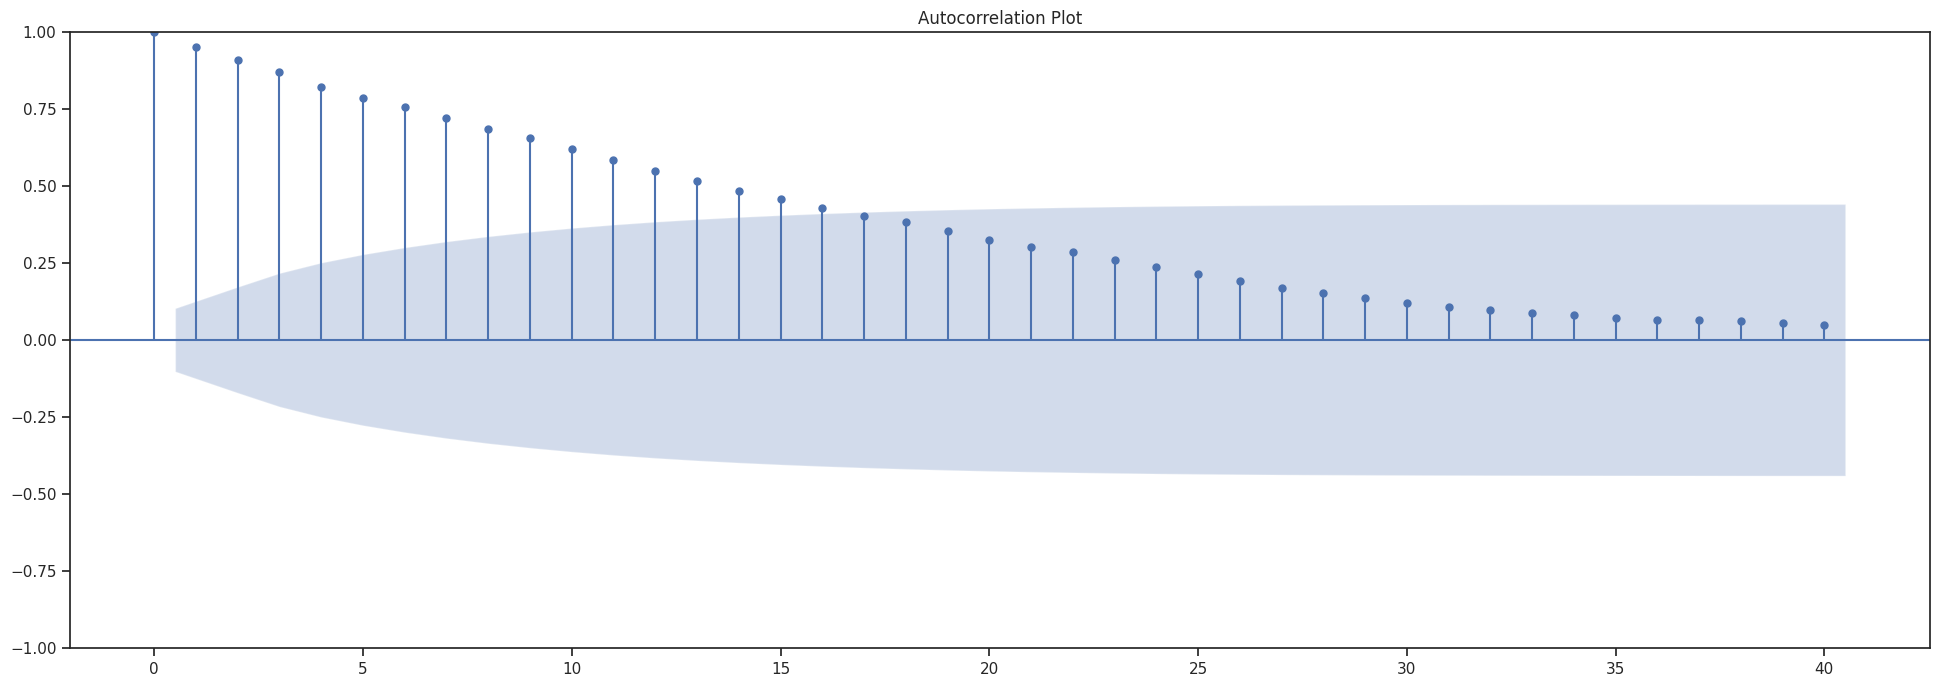

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Generate dummy time series data
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
dummy_data = np.random.randn(len(date_rng)).cumsum()

# Ensure positive trend only
dummy_data[dummy_data < 0] = 0

# Create a DataFrame
df = pd.DataFrame(data={'date': date_rng, 'value': dummy_data})

# Plot autocorrelation
plt.figure(figsize=(10, 6))
plot_acf(df['value'], lags=40, title='Autocorrelation Plot')

# Show the plot
plt.show()


In [27]:
import statsmodels.tsa.api as smt
def plot_multi_acf(data, lags, titles, ylim=None, partial=False):
    num_plots = len(lags)
    fig, ax = plt.subplots(len(lags), 1, figsize=(10, 3 * num_plots));
    if num_plots == 1:
        ax = [ax]
    acf_func = smt.graphics.plot_pacf if partial else smt.graphics.plot_acf
    for idx, (lag, title) in enumerate(zip(lags, titles)):
        fig = acf_func(data, lags=lag, ax=ax[idx], title=title);
        if ylim is not None:
            ax[idx].set_ylim(ylim);

    fig.tight_layout();

In [30]:
titles= ['Autocorrelation: 3-Hour Lag',
         'Autocorrelation: 1-Day Lag',
         'Autocorrelation: 1-Week Lag']
period_minutes = 30
samples_per_hour = int(60 / period_minutes)
samples_per_day = int(24 * samples_per_hour)
samples_per_week = int(7 * samples_per_day)

lags = [3 * samples_per_hour, samples_per_day, samples_per_week]

plot_multi_acf(df[:-1]['slope_ascent'], lags, titles, partial=True)


KeyboardInterrupt



Error in callback <function flush_figures at 0x7f279cf7e5f0> (for post_execute):



KeyboardInterrupt



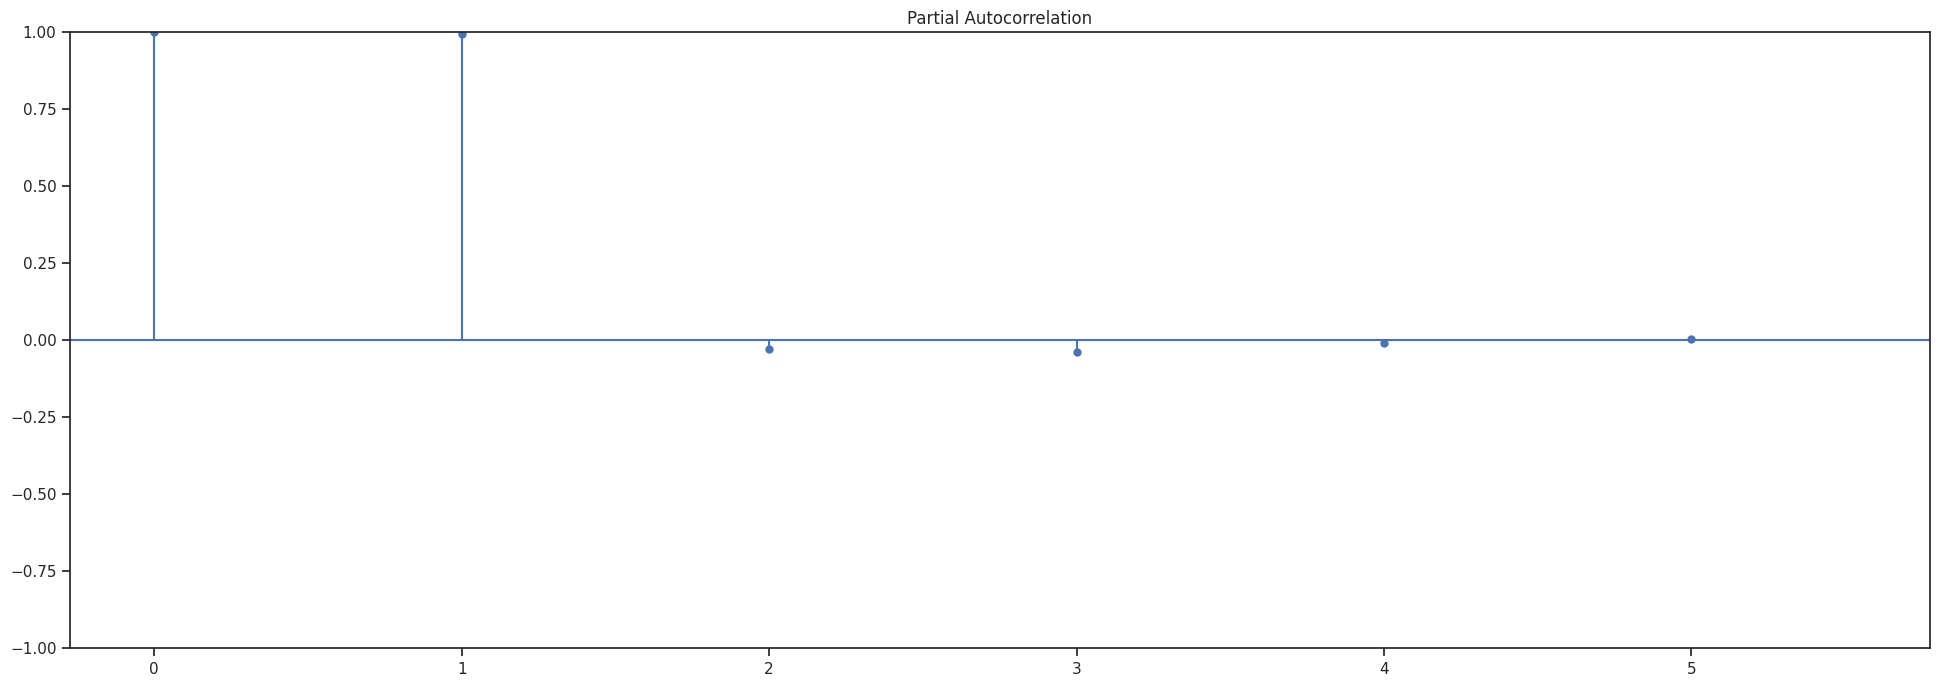

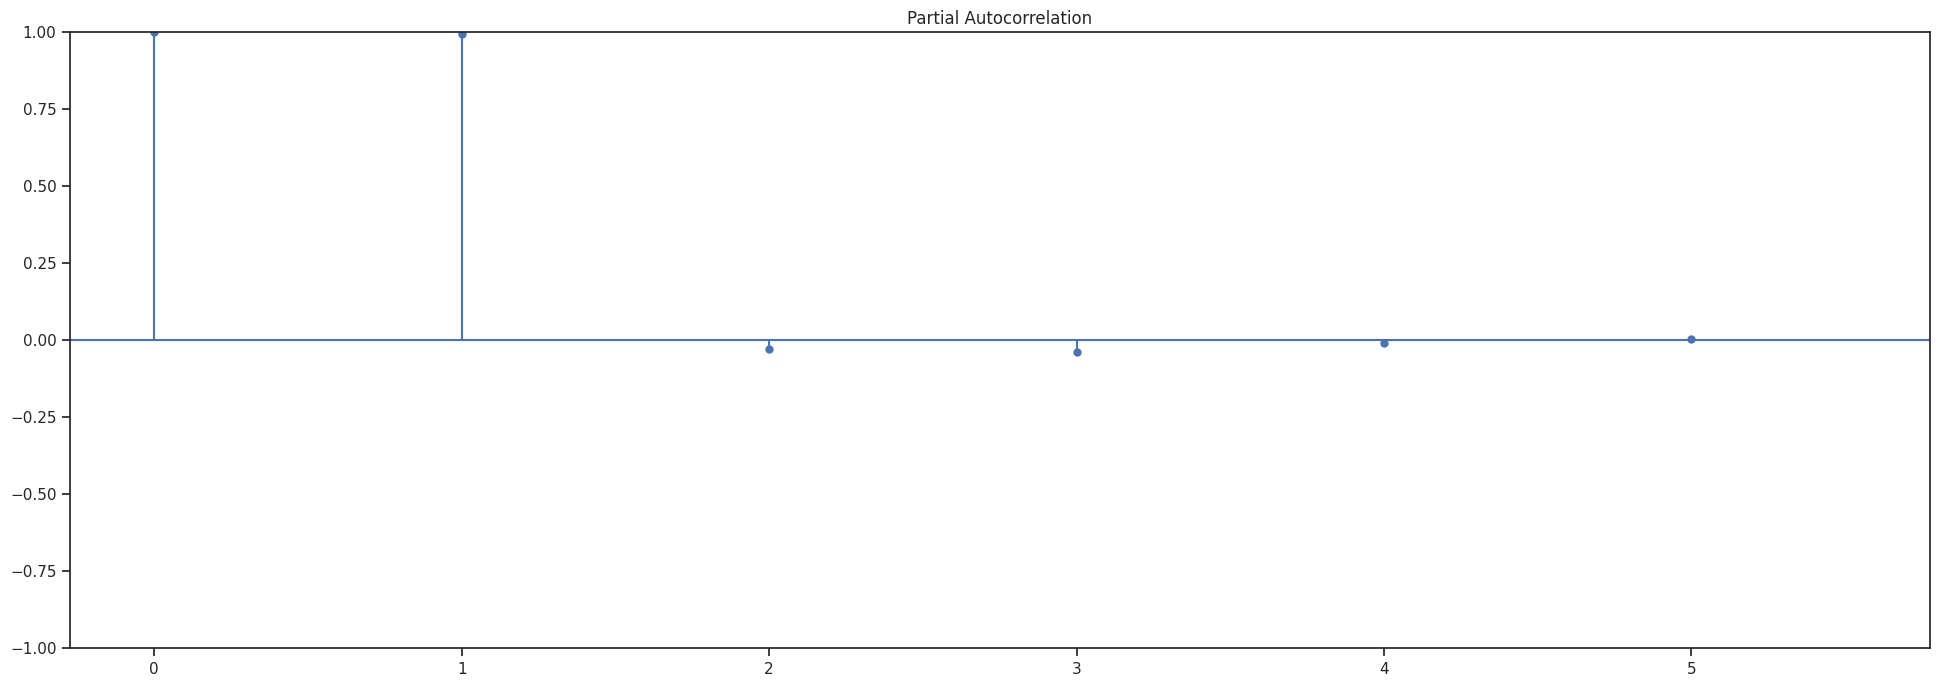

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(df[:-1]['heart_rate'], lags=5)

In [ ]:
df[:-1].isna().sum()

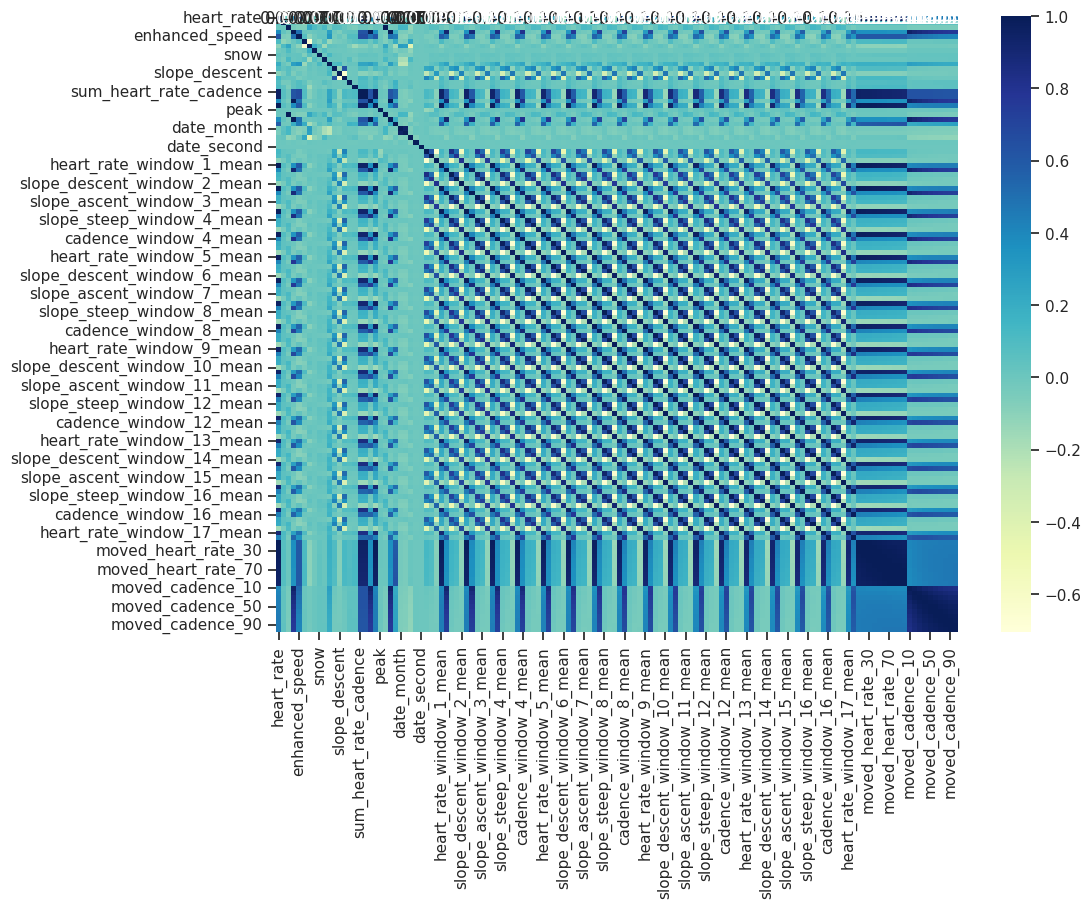

In [33]:
corr = df[:-1].corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="YlGnBu",annot=True)
plt.show()